<a href="https://colab.research.google.com/github/aglie/iucr2020_compschool/blob/main/arkadiy_eigenvalues_101/Tutorial_2_eigenvalues_of_1d_molecule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normal mode analysis

Taking a molecule in equilibrium configuration we expand the forces linearly in displacements of each atom. The equations of motion then:

$$
m_i d \ddot{x}_i =  \sum_j \frac{\partial f_i}{\partial x_j} dx_j
$$

If masses of all atoms are the same, we can solve this equations by moving the masses $m_i$ to the right hand side, and defining the dynamic matrix $D$ where $D_{ij}$ is proportional to minus of the force $- \partial f_j$ acted on atom $j$ when atom $i$ is diplaced by $\partial x_i$ reduced by masses:

$$
D_{ij} =  - \frac{1}{m} \frac{\partial f_i}{\partial x_j}= - \frac{1}{m}\frac{\partial^2 E}{\partial x_i \partial x_j}
$$

If the masses are not the same, the equation is still solved in an identical way, but in this case synamical matrix is reduced by $\sqrt{m_i m_j}$ and also reduce displacement to $\xi_i = dx_i/\sqrt{m_i}$, but I would like to avoid this technicality here.

Using dynamical matrix the equations of motions can be written as:

$$
\mathbf { d\ddot{x}} = - D \mathbf {dx}
$$

The matrix equation above can be separated into a set of linear equations by using eigenvectors. For instance if displacement of atoms $\mathbf {dx}$ is lies along an eigenvector $\mathbf h$: 

$$
\mathbf {dx} = - dx \mathbf {h}
$$

then acceleration is also aligned along $\mathbf h$

$$
\mathbf { d\ddot{x}} = - D \mathbf {dx} = - dx \lambda \mathbf{h} \propto \mathbf{h}
$$

And the equation of motion can be rewritten as a scalar equation

$$
 d\ddot{x} \mathbf{h} = - dx \lambda \mathbf h
$$

or removing $\mathbf h $ from both sides

$$
d\ddot x = -\lambda dx
$$

with the known solution

$$
x(t) = \cos(\sqrt{\lambda}t + \phi)
$$

In general, we can decompose any initial configuration of atoms into a sum of eigenvectors $\mathbf h_i$ of $D$:

$$
\mathbf{dx} = \sum_i a_i \mathbf  h_i
$$

where $a_i = (\mathbf{dx} \cdot \mathbf h_i)$ is the projection of $\mathbf {dx}$ on $\mathbf h_i$. Thus the general solution is:

$$
x(t) = \sum_i a_i \cos(\omega _i t + \phi_i) \mathbf h _i
$$

where we have defined $\omega_i = \sqrt{\lambda_i}$.


In this exercise we will perform normal mode analysis to a simple four atomic molecule.

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Helper functions

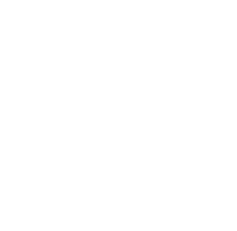

In [ ]:
figsize(6,6)
def plot_atoms_and_forces(x, y, forces = None, ax = None):
  """Draw molecule as points and lines, and forces"""
  if not ax:
    ax = gca()

  ax.plot(x, 0*y, color=ones(3)*0.9, zorder=0) #gray baseline 
  ax.plot(x, y, '.-', markersize=20, color='black', zorder=2 )
  ax.axis('off')
  ax.axis([-0.5, 3.5, -2, 2])

  if forces is not None:
    ax.quiver(x, y, forces*0, forces, color='orange', scale = 10, zorder=1)

fig, ax = subplots(1,1, figsize=(4,4)) # define figure and axes to render dynamic visualizations
_ = axis('off')

# Prepare a linear "molecule"

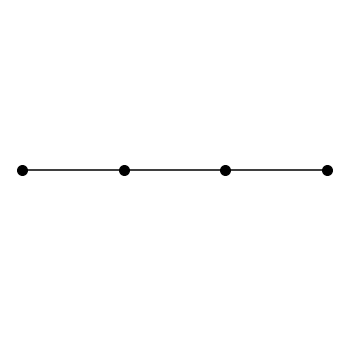

In [ ]:
x = array([0, 1, 2, 3]) #define coordinates by hand
y = array([0, 0, 0, 0])

#show the resulting "molecule"
plot(x, y, '.-', markersize=20, color='black')
_ = axis('off') #remove axes

# Define dynamical matrix

In [ ]:
# For a molecule containing atoms of the same mass, dynamical matrix elements 
# Dij are proportional proportional to the force acted on atom i on displacing
# atom j. We will use the following matrix for our molecule

D =-array([[-1, 1, 0, 0],
           [ 1,-2, 1, 0],
           [ 0, 1,-2, 1],
           [ 0, 0, 1,-1]])

# Demonstrate a dynamical matrix

Apply a vector of displacements and inspect that forces follow the pattern we expect.

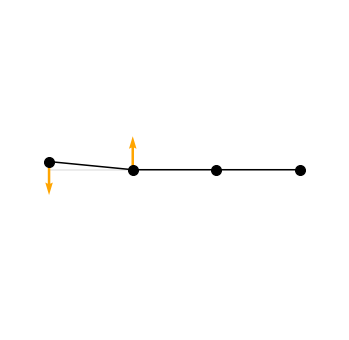

In [ ]:
dy = array([1, 0, 0, 0]) #generate a diplacement for one atom, along the 
disp_scale = 0.1 # scale for showing displacement

y = dy*disp_scale # define vertical coordinate of each atom according to chosed displacement

forces = - dot(D, dy) # calculate forces. Note the minus sign as

plot_atoms_and_forces(x, y, forces)

# Task 0: Examine other components of $D$

Check that the other three components of D make sense.

# Task 1: Find normal modes of our molecule

Find eigenmode of dynamical matrix, explore its eigenvalues, plot eigenvectors

In [ ]:
lam, vecs = ... #calculate 

no_normal_mode = 1
#dy =    Here extract the vector for no_normal_mode

# calculate forces

#plot_atoms_and_forces(x, y, forces)

# Solution

In [ ]:
lam, vecs = eig(D) #calculate eigenvectors and eigenvalues 

frequencies = sqrt(lam) #frequencies of motions are square roots of eigenvalues
frequencies

array([1.84775907e+00, 1.41421356e+00, 9.60757605e-09, 7.65366865e-01])

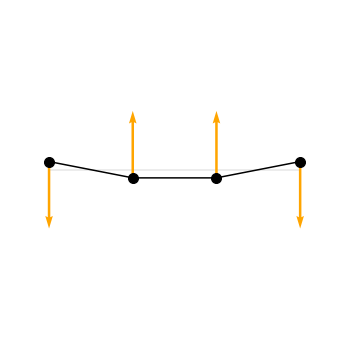

In [ ]:
no_normal_mode = 1 #showing the second normal mode

dy = 2*vecs[:, no_normal_mode] # extract the vector of displacements
disp_scale = 0.1 # scale for showing displacement

y = dy*disp_scale # define vertical coordinate of each atom according to chosed displacement

forces = - dot(D, dy) # calculate forces. Note the minus sign as

#Draw the shape of the normal mode
plot_atoms_and_forces(x, y, forces)

# Show atomic vibrations 

Python and matplotlib allows to visualize dynamic graphics and in our case show how the molecule vibrates. In order to do this we need to define a function, I called it `frame(n)` in our case, which draws a single frame. Then, we can use the function `animation` from `matplotlib` package which will run our function a number of times and package the result into an interactive graph. 

In [ ]:
import matplotlib.animation as animation # Import matplotlib.animation function
rc('animation', html='jshtml') # use the jshtml rendering for seeing result in the browser

In [ ]:
25*1.4

35.0

In [ ]:
frequencies

array([1.84775907e+00, 1.41421356e+00, 9.60757605e-09, 7.65366865e-01])

In [ ]:
N = 1 # we will show second normal mode


lam, vecs = eig(D) #recalculate eigenvectors just in case
frequencies = sqrt(lam) #frequencies of motions are square roots of 
delays = 30/frequencies #we will need delays between frames
delays[delays>10000] = 10000 #One of the frequencies is low, thus will give very 
#larte delays, we trim it to something manageble


def frame(frame_number):
    #This function will use N and ax variables which are 
    #defined in the global scope
    ax.clear() #clear previous frame
    omega_times_t = 2*pi*frame_number/100 # calculate omega*t
    # we will render just one period of vibration omega t = 0....2pi
    a = 2*cos(omega_times_t) # calcualte amplitude of atomic displacement at this frame
    h = vecs[:, N] # extract eigenvector
    dy = a*h #calculate displacement as cos(omega t) h
    forces = -dot(D, dy) #calculate forces
    plot_atoms_and_forces(x, dy*0.2, forces, ax=ax) #plot displacements and forces

# Now we render everything together
anim = animation.FuncAnimation(fig, #figure to render
                                frame, #function to draw one frame
                                frames=100, #we will have 100 frames
                                repeat=True, #later when we render it will be looped
                                interval=delays[N] #delay between frames in milliseconds
                                #we will make delay proportional to frequencies
                                #to visually see which normal mode is faster
                                )

#To show animation simply. Click play to see it live
anim

In [ ]:
#We can redo rendering for another mode
N = 0
anim2 = animation.FuncAnimation(fig, frame, frames=100, repeat=True,
                               interval=delays[N])
anim2

# Task 2 (simple): visualize the other eigenvalues

Question: what is wrong with the eigenvector N=2?

# Solution


In [ ]:
#We can redo rendering for 
N = 2
anim3 = animation.FuncAnimation(fig, frame, frames=100, repeat=True,
                               interval=delays[N])
anim3

Note that above movie doesn't move. It is because corresponding frequency is essentially zero and once we displace all atoms up or down there is no returning force, so there will be no vibration for such displacement.

In [ ]:
# The frequency is essentially zero
frequencies

array([1.84775907e+00, 1.41421356e+00, 9.60757605e-09, 7.65366865e-01])

In [ ]:
# and our delay is enormous. 
delays[2]

10000.0

# Task 3 (challenging): random displacement

Show a vibration of a molecule which is not displaced along a normal mode.

Use the equation

$$
x(t) = \sum_i a_i  \cos(\omega _i t + \phi_i) \mathbf h _i
$$


In [ ]:
dy = array([0, 2, 0, 0]) #use this as a starting configuration



# Solution

In [ ]:
dot(vecs, [0,0,1,0])

array([-0.5, -0.5, -0.5, -0.5])

In [ ]:
dy = array([0, 2, 0, 0])

lam, vecs = eig(D) #recalculate eigenvalues just in case
frequencies = sqrt(lam) 

a = dot(vecs.T, dy) #calculate amplitudes normal modes at the start


def frame(frame_number):
    ax.clear()
    time = 2*pi*frame_number/50 #this time we increment time

    current_a = a*cos(frequencies*time) #propagate all normal modes with corresponding frequencies

    dy = dot(vecs, current_a) #calculate displacement 

    forces = -dot(D, dy)
    plot_atoms_and_forces(x, dy*0.2, forces, ax=ax)

# calculation may take some time
animation.FuncAnimation(fig, frame, frames=1000, repeat=True, 
                                interval=30)

# Task 4 calculate normal modes of a molecule with 10 atoms
